# 1 用GeoPandas 画美国地图

首先导入`geopandas`、`matplotlib` 以及一些后面要用到的包：

In [22]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
from geopandas import GeoDataFrame

%matplotlib inline 

用`geopandas.read_file()`函数读取美国地图的shp文件：

In [3]:
states = geopandas.read_file('data/shapefiles/us_state/tl_2017_us_state.shp')

`states`变量的格式以及内容：

In [6]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [7]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


通过`states`变量画美国地图（这里把经纬度范围限制在了美国本土区域）：

(-130.0, -65.0, 24.0, 50.0)

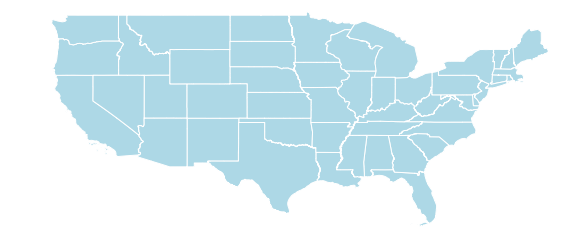

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 10))

states.plot(color = 'lightblue',ax = ax, edgecolor='white', linewidth=1)
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')

读取美国各州年平均降水数据：

In [9]:
prcp = pd.read_csv('data/annual_precipitation.csv')  

In [10]:
prcp.head()

,NAME,Inches,Millimetres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


合并降水数据变量和州边界变量：

In [11]:
states = pd.merge(left = states, right= prcp,left_on = 'NAME', right_on = 'NAME')

将合并产生的`states`变量转换成GeoDataFrame类型:

In [12]:
states = GeoDataFrame(states)

接下来，我们就可以通过geopandas plot 来显示美国各州的年降水量

Text(0, 0.5, 'Inches')

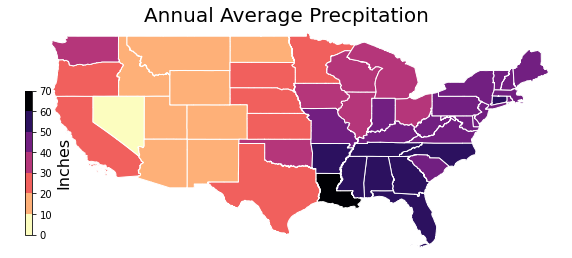

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 10))

vmin=0
vmax=70
cmap = plt.get_cmap('magma_r', 7)

states.plot(column='Inches',cmap = cmap, ax = ax, edgecolor='white', linewidth=1,vmin=vmin, vmax = vmax)
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')
ax.set_title('Annual Average Precpitation',fontsize=20)

# 添加 colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.37, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.ax.set_ylabel('Inches',fontsize=16)

# 2 用GeoPandas画流域热力图

我们读取18个流域的 shp 文件并将其合并:

In [14]:
for i in range(18):
    if i<9:
        fname = 'data/shapefiles/huc2/0' + str(i+1) + '/WBDHU2.shp'
    else:
        fname = 'data/shapefiles/huc2/' + str(i+1) + '/WBDHU2.shp'
    data = geopandas.read_file(fname)
    
    if i==0:
        huc = data
    else:
        huc = pd.concat([huc,data],ignore_index=True)
     

展示合并后的变量：

(-130.0, -65.0, 24.0, 50.0)

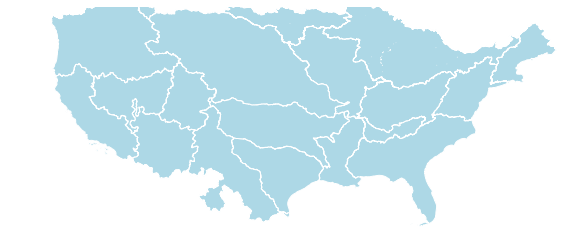

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 10))
huc.plot(ax = ax,edgecolor='white', linewidth=1,color = 'lightblue')
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')

如果要展示美国18个流域的具体情况，我们也可以通过同样的方法来进行实现。首先，我们读取需要展示的数据。比如，我们要展示模型在18个流域的模拟效率系数:

In [17]:
rsq = pd.read_csv('data/huc_rsq.csv')  

In [18]:
rsq.head()

,huc2,rsq
0,1,0.489816
1,2,0.507243
2,3,0.464579
3,4,0.615571
4,5,0.573188


然后合并 数据变量 和 huc 变量。我们直接通过row index合并就行，因为我的rsq数据是按照huc的序号进行输出的。

In [19]:
huc = pd.merge(left=rsq, right=huc,left_index=True, right_index=True)

我们需要将 `huc` 从 dataframe 数据转成 geodataframe数据，不然在画图中容易报错:

In [20]:
huc = GeoDataFrame(huc)

然后进行画图:

<AxesSubplot:title={'center':'Model Performance'}>

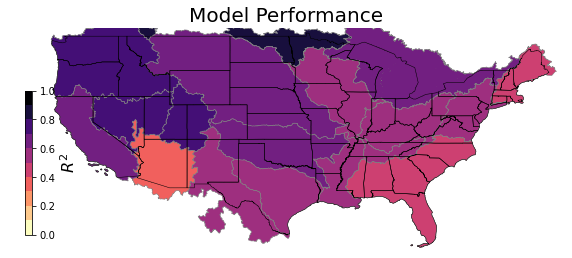

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 10))

vmin = 0
vmax = 1
cmap = plt.get_cmap('magma_r', 10)

huc.plot(column='rsq',cmap = cmap, ax = ax, edgecolor='grey', 
         linewidth=0.5,vmin=vmin, vmax = vmax)

ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')
ax.set_title('Model Performance',fontsize=20)

# Add colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), 
                           cmap=cmap)
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.37, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.ax.set_ylabel('$R^2$',fontsize=16)

# Add CONUS boundaries
states.boundary.plot(ax = ax, edgecolor='black', linewidth=0.5)
